In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve,auc

import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.io as pio
import sklearn
import plotly.express as ex
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Import the data
data=pd.read_csv('ai4i2020.csv')
# first 5 rows of data
data.head()
#last 5 rows of the data
data.tail()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0
9999,10000,M24859,M,299.0,308.7,1500,40.2,30,0,0,0,0,0,0


In [4]:
#Information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [5]:
#rows and columns in dataset
rows, columns = data.shape
print(f"number of rows: {rows}\number of columns:{columns}")

number of rows: 10000
umber of columns:14


In [6]:
#statistical information of numerical data
data.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [7]:
#check null values
#data.isnull().sum()
data.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [8]:
#check for duplicates
data.duplicated().sum()

0

In [9]:
# exploring categorical feature: product ID
data['Product ID']

0       M14860
1       L47181
2       L47182
3       L47183
4       L47184
         ...  
9995    M24855
9996    H39410
9997    M24857
9998    H39412
9999    M24859
Name: Product ID, Length: 10000, dtype: object

In [10]:
# exploring categorical feature: type with category types as L,M,H
low,med,high = data['Type'].value_counts()
print(f"Low quality product: {low}\nMedium Quality Product: {med}\nHigh Quality Product: {high}")

Low quality product: 6000
Medium Quality Product: 2997
High Quality Product: 1003


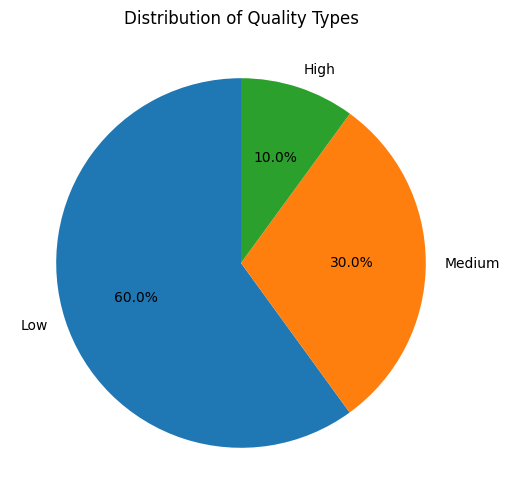

<BarContainer object of 3 artists>

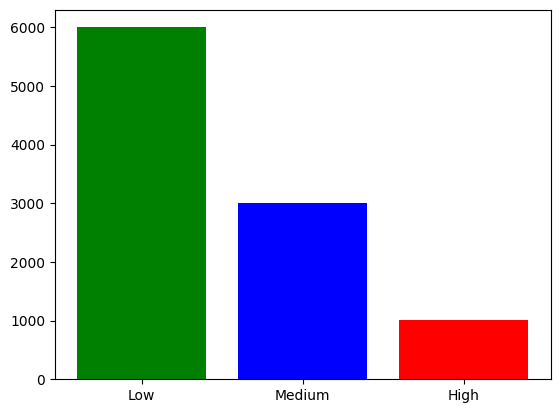

In [11]:
#visualizing Quality types
plt.figure(figsize=(6,6))
plt.title('Distribution of Quality Types')
label=['Low','Medium','High']
plt.pie([low,med,high],labels=label,autopct='%1.1f%%',startangle=90)
plt.show()
plt.bar(label,[low,med,high],color=['green','blue','red'])

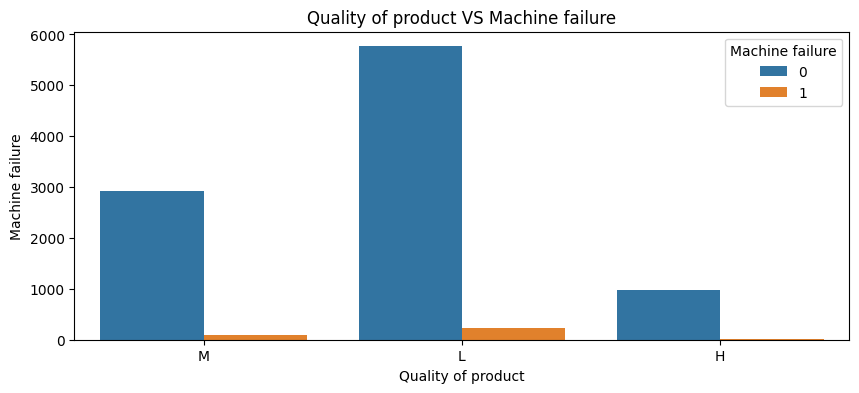

In [12]:
# visualising machine failure based on product quality
plt.figure(figsize=(10,4))
sns.countplot(data=data,x='Type', hue='Machine failure')
plt.title("Quality of product VS Machine failure")
plt.xlabel("Quality of product")
plt.ylabel("Machine failure")
plt.show()


In [14]:
# exploring target variable
zero, one = data['Machine failure'].value_counts()
print(f"Machine failure: {one}\nNo Machine failure: {zero}")

Machine failure: 339
No Machine failure: 9661


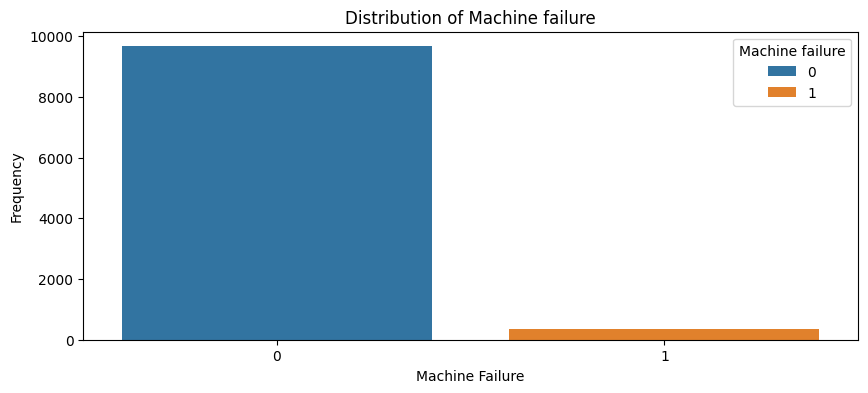

In [13]:
# visualising target variable (machine failure)
plt.figure(figsize=(10,4))
sns.countplot(x='Machine failure',data=data, hue='Machine failure')
plt.title("Distribution of Machine failure")
plt.xlabel("Machine Failure")
plt.ylabel("Frequency")
plt.show()

In [15]:
#five type of failure mode
failure5=['TWF','HDF','PWF','OSF','RNF']
data[failure5].head(5)

,TWF,HDF,PWF,OSF,RNF
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


In [36]:
#Machine failure consist 5 failure mode
data.loc[160:,failure5 + ['Machine failure']].head(10)

,TWF,HDF,PWF,OSF,RNF,Machine failure
160,0,0,0,1,0,1
161,0,0,0,1,0,1
162,0,0,0,0,0,0
163,0,0,0,0,0,0
164,0,0,0,0,0,0
165,0,0,0,0,0,0
166,0,0,0,0,0,0
167,0,0,0,0,0,0
168,0,0,1,0,0,1
169,0,0,0,0,0,0


In [37]:
#checking which failure mode is common
twf = data[data.TWF == 1].value_counts().sum()
hdf = data[data.HDF == 1].value_counts().sum()
pwf = data[data.PWF == 1].value_counts().sum()
osf = data[data.OSF == 1].value_counts().sum()
rnf = data[data.RNF == 1].value_counts().sum()
print(f"TWF: {twf}\nHDF: {hdf}\nPMF: {pwf}\nOSF: {osf}\nRNF: {rnf}")

TWF: 46
HDF: 115
PMF: 95
OSF: 98
RNF: 19


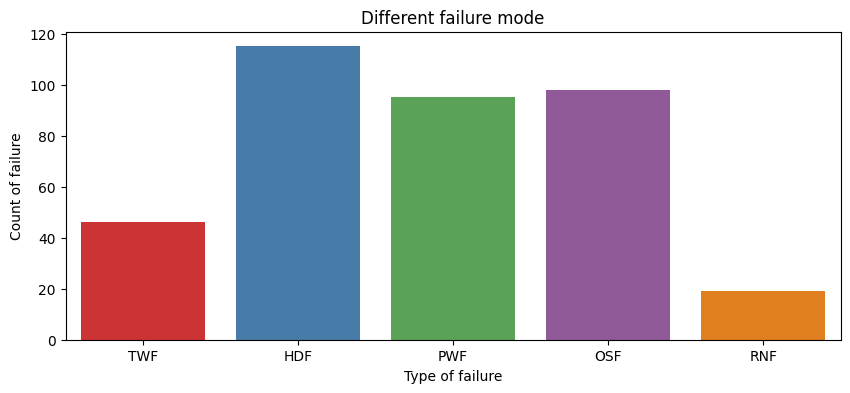

In [38]:
#visualising the failure mode
failure_types = data[['TWF','HDF','PWF','OSF','RNF']]
countf = failure_types.sum()
plt.figure(figsize=(10,4))
plt.title('Different failure mode')
plt.xlabel('Type of failure')
plt.ylabel('Count of failure')
sns.barplot(x=countf.index, y=countf.values, errorbar=None, palette="Set1")
plt.show()


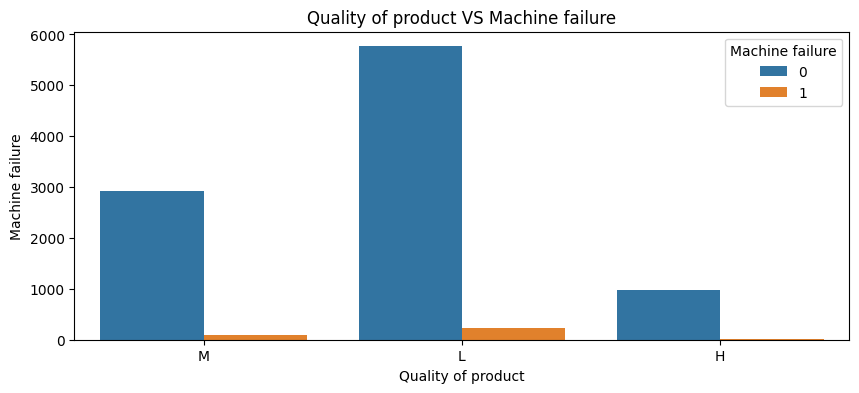

In [39]:
# visualising machine failure based on product quality
plt.figure(figsize=(10,4))
sns.countplot(data=data,x='Type', hue='Machine failure')
plt.title("Quality of product VS Machine failure")
plt.xlabel("Quality of product")
plt.ylabel("Machine failure")
plt.show()

In [40]:
#Pre processsing  The Dataset

#making a new dataframe (data) by copying original one
data1 = data.copy()
data1.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [41]:
#checking the data types of each variable
data1.dtypes

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

In [42]:
#We can drop Product ID containing (L,M,H) followed by numbers as we have Type column containing the same quality type (L,M,H)
#converting  object into numeric by label encoding
label_encoder = LabelEncoder()
data1['PType'] = label_encoder.fit_transform(data1['Type'])
data1.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,PType
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,2
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,1
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,1
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,1
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,1


In [43]:
#checking new value for Type after encoding
encoded_l = data1.loc[data1['Type']=='L','PType'].iloc[0]
encoded_m = data1.loc[data1['Type']=='M','PType'].iloc[0]
encoded_h = data1.loc[data1['Type']=='H','PType'].iloc[0]
print(f"L: {encoded_l}\nM: {encoded_m}\nH: {encoded_h}")

L: 1
M: 2
H: 0


In [44]:
#drop some features : UID, Type and prodcut ID
data1 =data1.drop(['UDI','Type','Product ID'], axis=1)
data1.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,PType
0,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,2
1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,1
2,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,1
3,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,1
4,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,1


                              TWF       HDF       PWF       OSF       RNF  \
TWF                      1.000000 -0.007332  0.008577  0.038243  0.030970   
HDF                     -0.007332  1.000000  0.018443  0.046396 -0.004706   
PWF                      0.008577  0.018443  1.000000  0.115836 -0.004273   
OSF                      0.038243  0.046396  0.115836  1.000000 -0.004341   
RNF                      0.030970 -0.004706 -0.004273 -0.004341  1.000000   
Air temperature [K]      0.009955  0.137831  0.003470  0.001988  0.017688   
Process temperature [K]  0.007315  0.056933 -0.003355  0.004554  0.022279   
Rotational speed [rpm]   0.010389 -0.121241  0.123018 -0.104575 -0.013088   
Torque [Nm]             -0.014662  0.142610  0.083781  0.183465  0.016136   
Tool wear [min]          0.115792 -0.001287 -0.009334  0.155894  0.011326   
Machine failure          0.362904  0.575800  0.522812  0.531083  0.004516   

                         Air temperature [K]  Process temperature [K]  \
TW

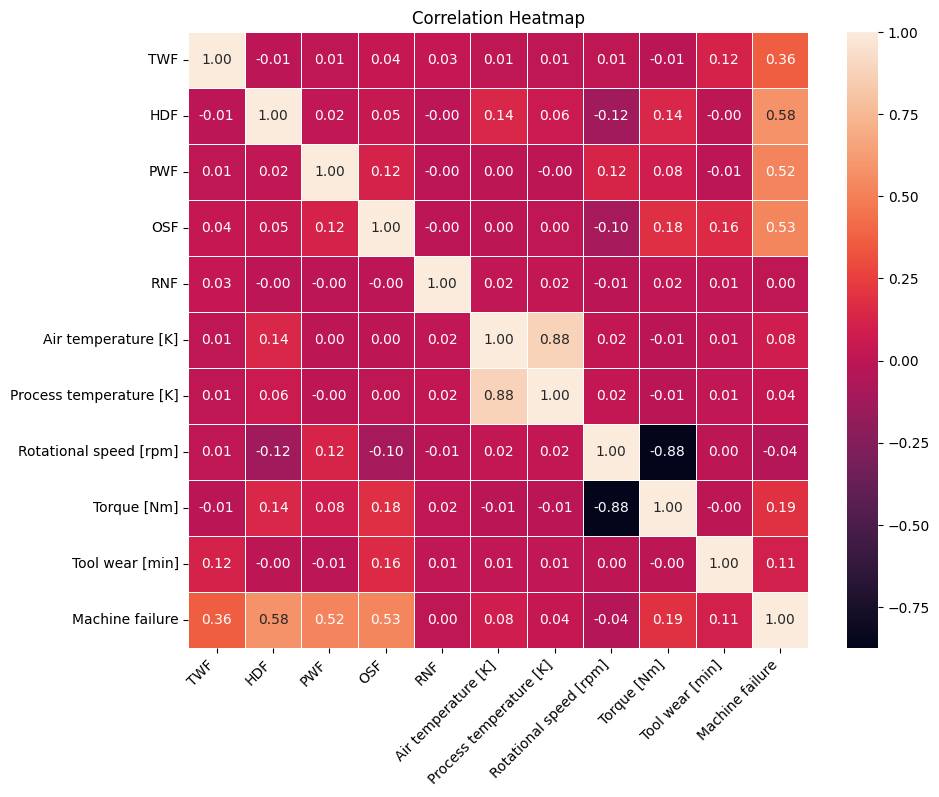

In [45]:
#calculating the correlation between the other features and Machine failure via Heatmap

plt.figure(figsize=(10,8))
heatmap_data = data1[['TWF','HDF','PWF','OSF','RNF','Air temperature [K]', 'Process temperature [K]','Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Machine failure']]
correlation_matrix = heatmap_data.corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='rocket', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.xticks(rotation=45, ha='right')
plt.show()

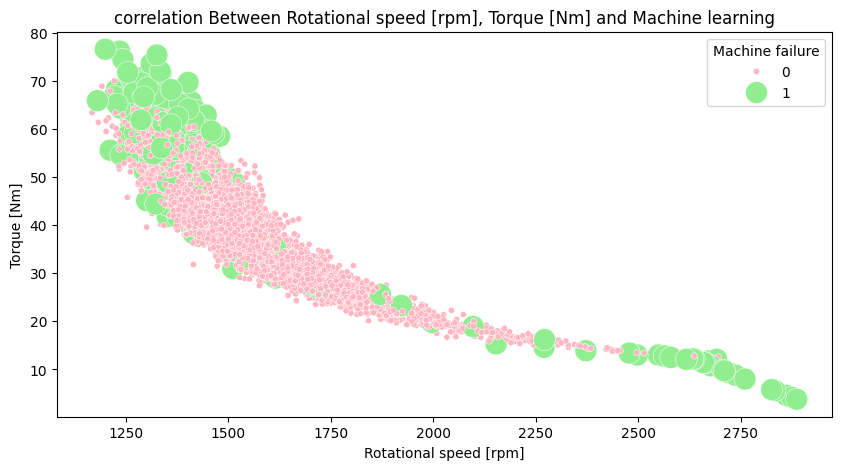

In [46]:
# Finding the correlation between the Rotational speed [rpm], Torque [Nm] and Machine failure

plt.figure(figsize=(10,5))
sns.scatterplot(x='Rotational speed [rpm]',y='Torque [Nm]', hue='Machine failure', palette=['lightpink','lightgreen'], data=data1,size='Machine failure', sizes=(250,20))
plt.title('correlation Between Rotational speed [rpm], Torque [Nm] and Machine learning')
plt.xlabel('Rotational speed [rpm]')
plt.ylabel('Torque [Nm]')
plt.show()

In [47]:
#From the above graph , we can analyze
#Most Machine failure occurs When Torque[Nm] value is high and Rotational speed [rpm] is also high

#splitting the data set into test and train

X = data1.drop('Machine failure',axis=1)
Y = data1['Machine failure']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, Y_train.shape,Y_test.shape)

(8000, 11) (2000, 11) (8000,) (2000,)


In [48]:
# making a dictionary containing different model initializations
models = {
    'Logistic Regression' : LogisticRegression(max_iter=1000),
    'Decision Tree' : DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'Support Vector Machine' : SVC()
}

In [49]:
#training and evaluating the accuracy of models
result = {}
Yprediction=[]
for name, model in models.items():
  model.fit(X_train, Y_train)
  Y_pred = model.predict(X_test)
  Yprediction.append(Y_pred)
  accuracy =accuracy_score(Y_test,Y_pred)
  result[name] = accuracy

In [50]:
#printing the result
for name,accuracy in result.items():
  print(f"{name} : {accuracy}")

Logistic Regression : 0.999
Decision Tree : 0.9975
Random Forest : 0.999
Support Vector Machine : 0.9695


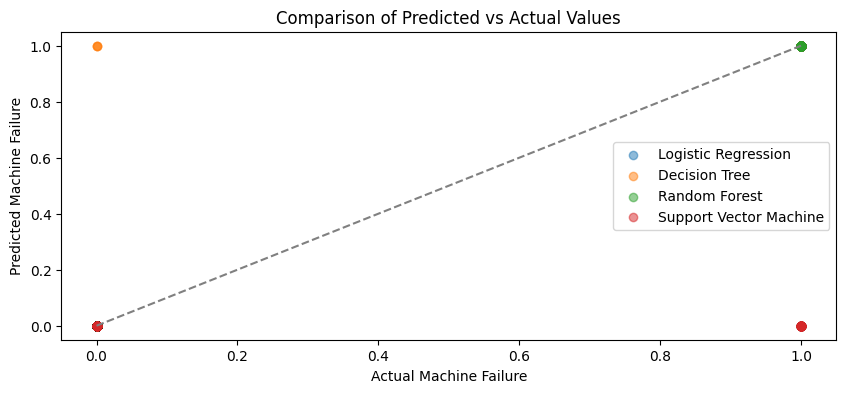

In [52]:
#performance of different ML models (High to Low)
#Logistic Regression(0.999)= Random Forest(0.999)>Decision Tree(0.997)>Support Vector Machine(0.9695)

#visualising the model performance
#scatterplot for each model
plt.figure(figsize=(10,4))
plt.xlabel('Actual Machine Failure')
plt.ylabel('Predicted Machine Failure')
plt.title('Comparison of Predicted vs Actual Values')
for i, model_name in enumerate(models.keys()):
  plt.scatter(Y_test, Yprediction[i], label=model_name, alpha=0.5)
#diagonal line
plt.plot([min(Y_test),max(Y_test)],[min(Y_test),max(Y_test)],'--',color='grey')
plt.legend()
plt.show()

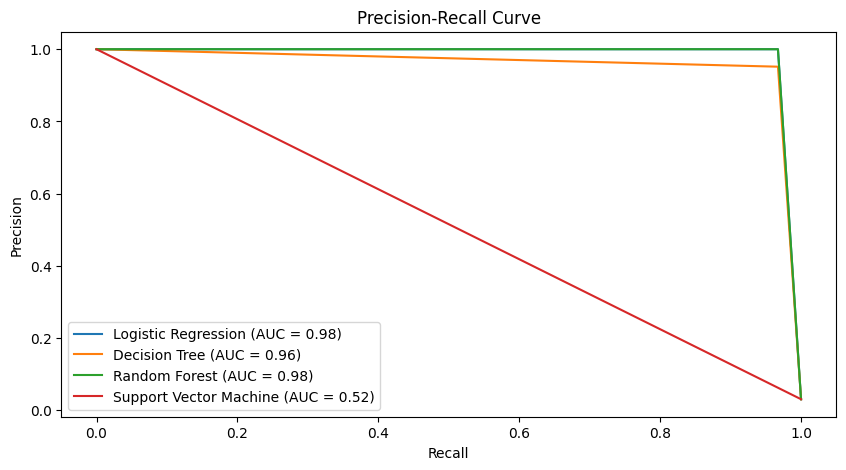

In [56]:
#precision- recall curve for each model
plt.figure(figsize=(10,5))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
for i,model_name in enumerate(models.keys()):
  precision, recall, _ = precision_recall_curve(Y_test,Yprediction[i])
  pr_auc=auc(recall,precision)
  plt.plot(recall,precision,label=f"{model_name} (AUC = {pr_auc:.2f})")
plt.legend()
plt.show()